# Preprocessing Overview

In this section, I focus on the data preprocessing steps required to prepare the dataset for analysis and modeling. The main objective of preprocessing is to clean, transform, and organize the data to ensure its readiness for the modeling phase. The following steps were performed:

1. **Handling Missing Values**:
   - Checked for missing values across the dataset and applied appropriate methods to handle them, such as imputation or removal.

2. **Data Type Conversion**:
   - Converted columns with incorrect data types to their appropriate types (e.g., categorical columns were converted to `category` type, numerical columns to `int` or `float`).

3. **Feature Engineering**:
   - Extracted new features based on existing ones. For instance, creating new variables like 'Expiry Year' from the 'Expiry' column to help in further analysis.

4. **Categorical Encoding**:
   - Applied encoding methods (like `LabelEncoder` or `OneHotEncoder`) to convert categorical variables into numeric representations, enabling them to be used in machine learning models.

5. **Outlier Detection**:
   - Identified and handled outliers using statistical methods or visualization tools to ensure they do not adversely affect the modeling process.

6. **Scaling**:
   - Standardized numerical features using scaling methods such as `StandardScaler` to ensure that the features are on the same scale and improve the model’s performance.

7. **Data Exploration**:
   - Explored the distribution of key features and visualized relationships between variables using plots to gain insights and inform feature selection.

By performing these preprocessing steps, we ensure that the data is clean, organized, and suitable for further analysis and predictive modeling.


In [1]:
# Importing neccesary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("../data/data2.csv")

In [3]:
data = data.drop(['Credit_card_number', 'Expiry', 'Security_code'], axis=1)
data.isnull().sum()

Profession    0
Income        0
Fraud         0
dtype: int64

- Removal of Sensitive and Irrelevant Columns: 
The dataset initially contained sensitive and irrelevant columns, such as **Credit Card Number**, **Expiry**, and **Security Code**, which were removed as part of the preprocessing step.
Justification for Dropping Columns
  - **Privacy Concerns**:  
  Columns such as **Credit Card Number**, **Expiry**, and **Security Code** contain sensitive information that should not be processed or stored unnecessarily, as they violate data privacy and security best practices.

  - **Irrelevance to the Target**:  
  These columns do not contribute meaningfully to the prediction of the target variable (**Fraud**). Including them might lead to overfitting or unnecessary complexity in the model.

- Checking for Missing Values
The analysis of missing values showed the number of null values in each column. This step ensures data completeness and helps identify whether further cleaning or imputation is needed for remaining columns such as **Profession**, **Income**, or **Fraud**. Addressing missing values is crucial for preparing the dataset for analysis and modeling.

In [4]:
# Encode Categorical variable
data['Profession'] = LabelEncoder().fit_transform(data['Profession'])

To prepare the dataset for machine learning models, the categorical variable Profession was encoded using LabelEncoder. This process transformed the distinct profession categories (e.g., Doctor, Lawyer, Other) into numerical values (0, 1, 2), allowing models to process this feature effectively. Encoding categorical variables ensures compatibility with algorithms while preserving the distinctions between categories for predictive analysis.

In [5]:
# Feature Scaling
scaler = StandardScaler()
data['Income'] = scaler.fit_transform(data[['Income']])

Feature scaling was applied to the Income column using StandardScaler to standardize its values. This transformation scaled the income data to have a mean of 0 and a standard deviation of 1, ensuring that the feature is on the same scale as others. Standardization prevents features with larger magnitudes, such as income, from disproportionately influencing the performance of machine learning models.

In [6]:
# Define Freatures and target variable
X = data.drop('Fraud', axis=1)
y = data['Fraud']

The features (X) were defined by dropping the target variable Fraud from the dataset, while y was set as the target variable. This separation prepares the data for model training and evaluation.

In [7]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The dataset was split into training and testing sets, with 80% of the data allocated for training and 20% for testing. This ensures an unbiased evaluation of the model's performance.

In [8]:
# Model Building (Hybrid Model)
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Define stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

The stacking classifier was built using two base models: RandomForestClassifier and GradientBoostingClassifier, with LogisticRegression as the final estimator. This approach was chosen to leverage the strengths of multiple algorithms by combining their predictions, which often improves model accuracy and robustness. After training the stacking classifier, the model integrates the outputs from the base models and refines the prediction using logistic regression. The result is a more powerful model that is expected to outperform individual models by reducing bias and variance.


              precision    recall  f1-score   support

           0       0.49      0.41      0.44       995
           1       0.50      0.59      0.54      1005

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000

ROC AUC Score: 0.4992919822995574


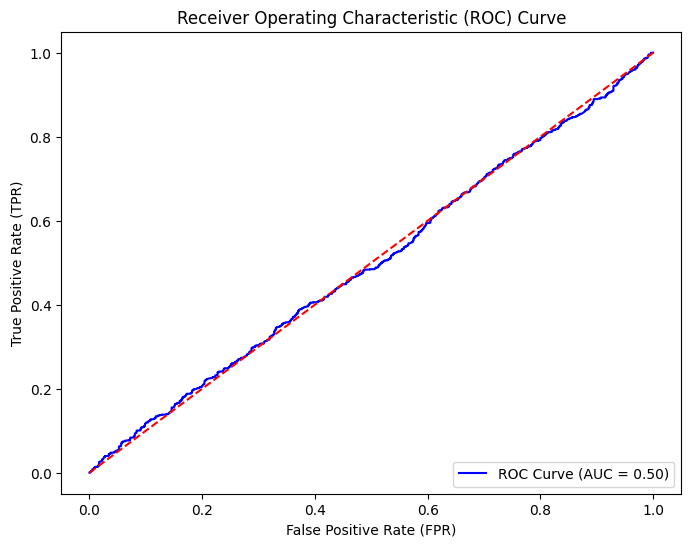

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get model predictions
y_pred = stacking_clf.predict(X_test)
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Print classification report and ROC AUC Score
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'C': 0.1}
Best score: 0.5001249999999999


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'C': 10, 'kernel': 'linear'}
Best score: 0.507875


In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [100, 200], 'max_depth': [3, 6, 10]}
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.5101249999999999


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.509625
